In [67]:
import torch
import torch.nn as nn
import torch.nn.functional as F  # Import the functional API
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [68]:
# Transformations for the input data
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_path = '/Users/markusbaumann/Documents/CS/computervision/Project/emotions/train'  
test_path = '/Users/markusbaumann/Documents/CS/computervision/Project/emotions/test'   


train_dataset = datasets.ImageFolder(train_path, transform=transform)
test_dataset = datasets.ImageFolder(test_path, transform=transform)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)



In [69]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 12 * 12, 1000)  
        self.fc2 = nn.Linear(1000, 7)  

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

    def num_flat_features(self, x):
        size = x.size()[1:]  
        num_features = 1
        for s in size:
            num_features *= s
        return num_features



In [70]:

model = SimpleCNN()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = nn.CrossEntropyLoss()


In [75]:
num_epochs = 10 
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 20 == 0:
            print(f'Epoch: {epoch}, Batch: {batch_idx}, Loss: {loss.item()}')


Epoch: 0, Batch: 0, Loss: 0.03588787093758583
Epoch: 0, Batch: 20, Loss: 0.11444223672151566
Epoch: 0, Batch: 40, Loss: 0.09496039897203445
Epoch: 0, Batch: 60, Loss: 0.08841338753700256
Epoch: 0, Batch: 80, Loss: 0.023615935817360878
Epoch: 0, Batch: 100, Loss: 0.04898633435368538
Epoch: 0, Batch: 120, Loss: 0.09959016740322113
Epoch: 0, Batch: 140, Loss: 0.09536175429821014
Epoch: 0, Batch: 160, Loss: 0.1247774064540863
Epoch: 0, Batch: 180, Loss: 0.09852943569421768
Epoch: 0, Batch: 200, Loss: 0.049290597438812256
Epoch: 0, Batch: 220, Loss: 0.20845288038253784
Epoch: 0, Batch: 240, Loss: 0.07017765939235687
Epoch: 0, Batch: 260, Loss: 0.0819307416677475
Epoch: 0, Batch: 280, Loss: 0.07417497783899307
Epoch: 0, Batch: 300, Loss: 0.09630606323480606
Epoch: 0, Batch: 320, Loss: 0.06252764165401459
Epoch: 0, Batch: 340, Loss: 0.1307602971792221
Epoch: 0, Batch: 360, Loss: 0.13355587422847748
Epoch: 0, Batch: 380, Loss: 0.22247900068759918
Epoch: 0, Batch: 400, Loss: 0.1260640174150467


In [78]:
model.eval()  
correct = 0
total = 0

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')

Accuracy on the test set: 56.91%


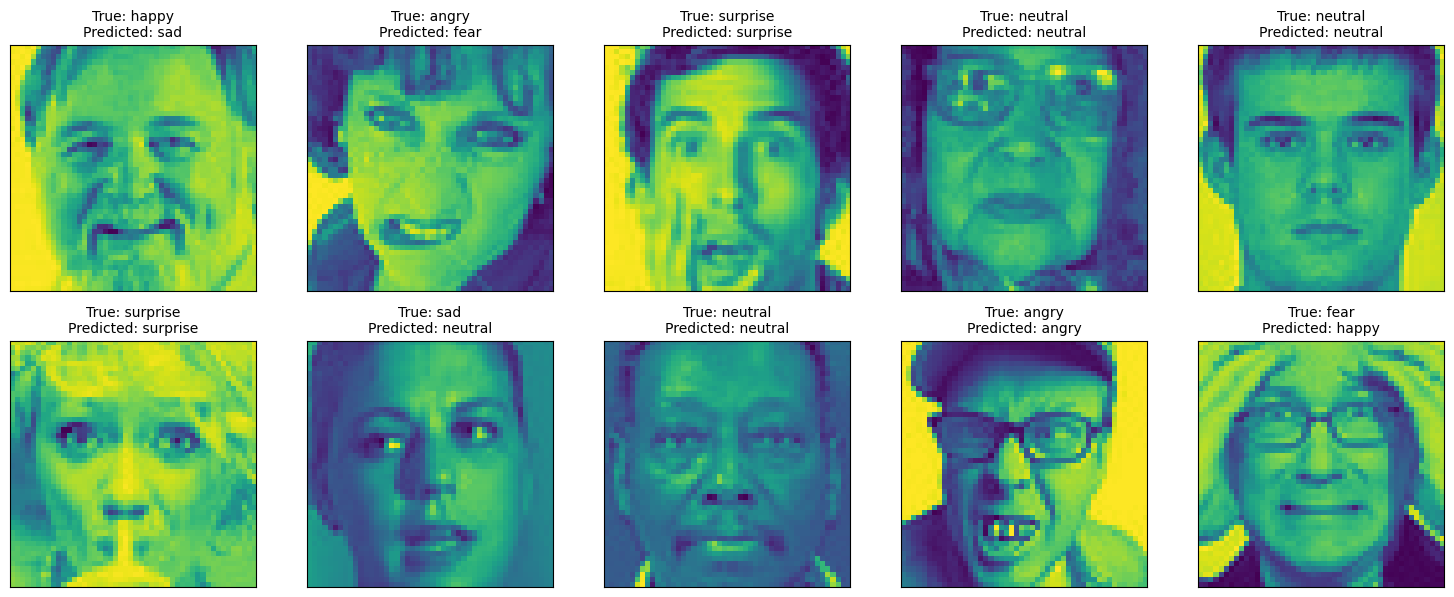

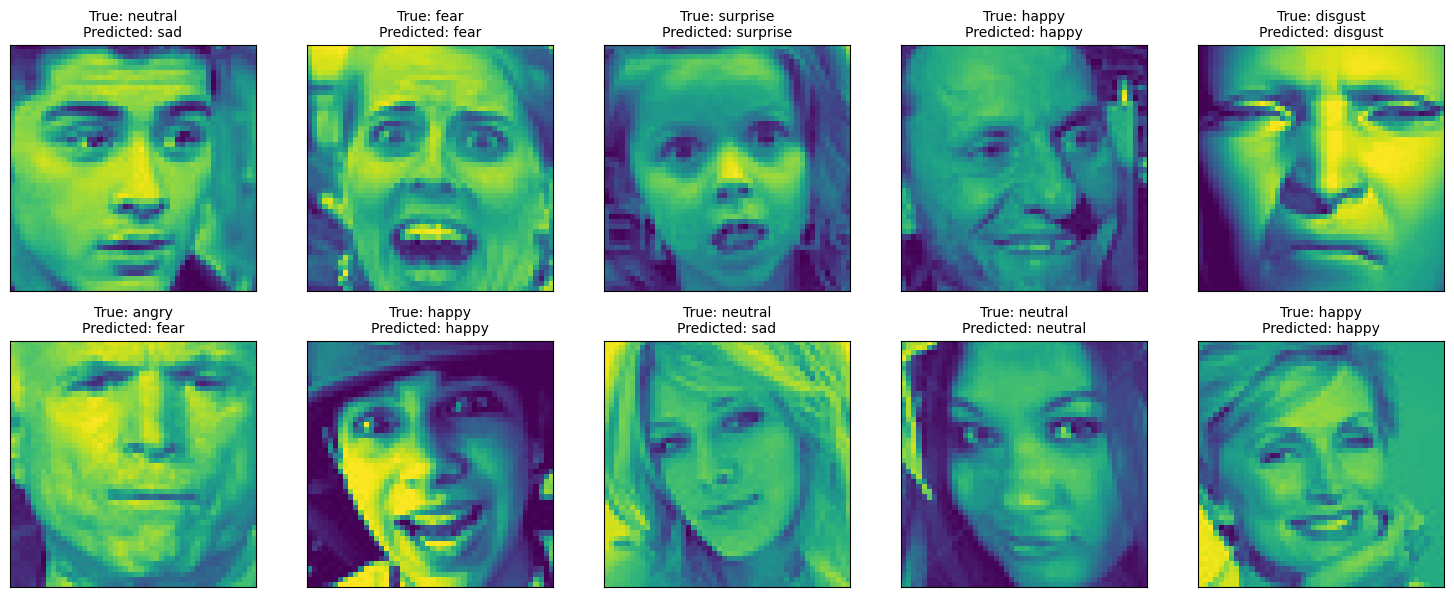

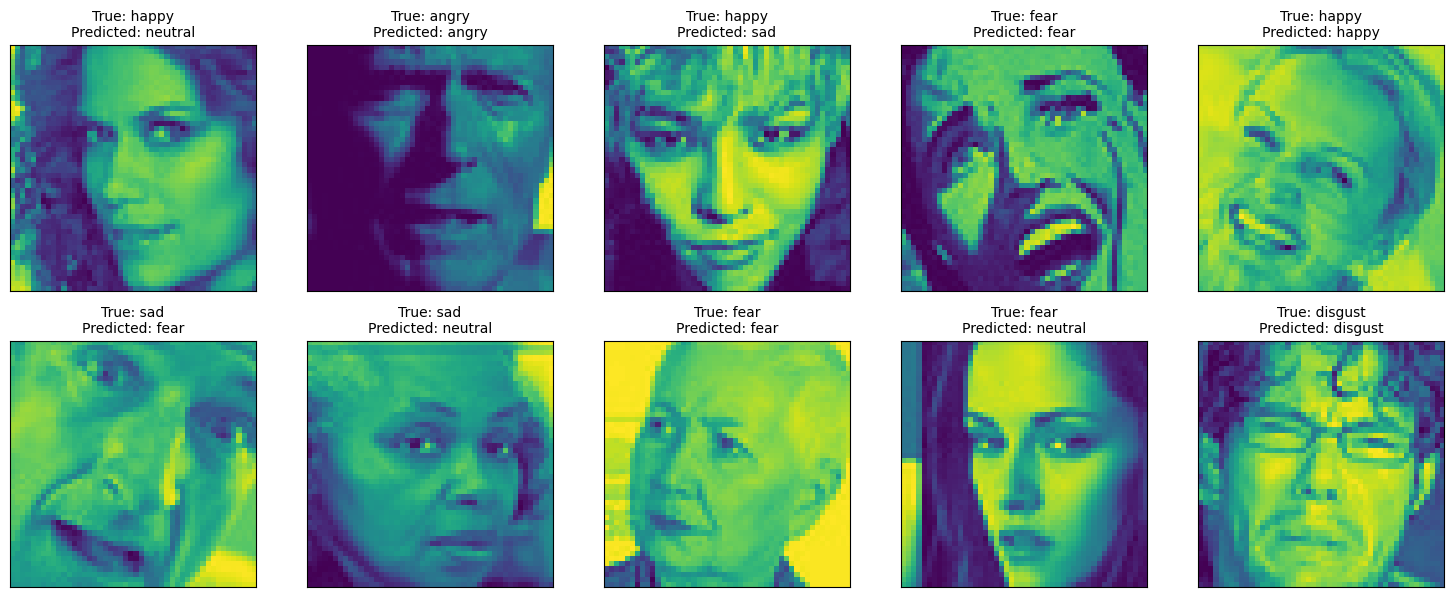

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def imshow(img):
    img = img / 2 + 0.5  
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


for i in range(3): 
    dataiter = iter(test_loader)
    images, labels = next(dataiter)

    num_images = 10

    model.eval()
    outputs = model(images[:num_images])
    _, predicted = torch.max(outputs, 1)

    class_names = train_dataset.classes


    rows = 4
    cols = 5
    fig = plt.figure(figsize=(15, 12))

    for idx in range(num_images):
        ax = fig.add_subplot(rows, cols, idx + 1, xticks=[], yticks=[])
        imshow(images[idx])
        ax.set_title(f"True: {class_names[labels[idx]]}\nPredicted: {class_names[predicted[idx]]}", fontsize=10)

    plt.tight_layout()
    plt.show()



